In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import pandas as pd
import tensorflow as tf
from sklearn.datasets import make_classification
from tensorflow.keras.layers import Dense , Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError , BinaryCrossentropy
from tensorflow.keras.activations import sigmoid
plt.style.use('seaborn-v0_8-colorblind')
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)
np.set_printoptions(precision=2)

In [2]:
#data=pd.read_csv("C:/Users/fujitsuu/Downloads/HPI_master.csv")
#data
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

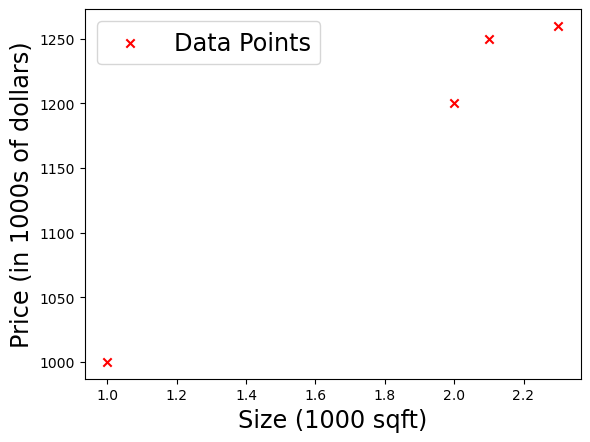

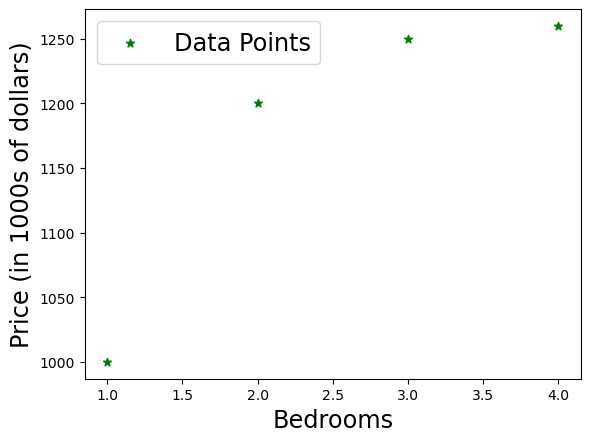

In [3]:
X_train = np.array([[1.0], [2.0],[2.1],[2.3]],dtype=np.float32)
Z_train = np.array([[1000],[1200],[1250],[1260]],dtype=np.float32)
Y_train = np.array([[1], [2],[3],[4]],dtype=np.float32)   

fig, ax=plt.subplots()
ax.scatter(X_train, Z_train, marker='x', c='r', label="Data Points")
ax.set_ylabel('Price (in 1000s of dollars)', fontsize='xx-large')
ax.set_xlabel('Size (1000 sqft)', fontsize='xx-large')
ax.legend( fontsize='xx-large')
plt.show()

fig, ax=plt.subplots()
ax.scatter(Y_train, Z_train, marker='*', c='g', label="Data Points")
ax.set_ylabel('Price (in 1000s of dollars)', fontsize='xx-large')
ax.set_xlabel('Bedrooms', fontsize='xx-large')
ax.legend( fontsize='xx-large')

plt.show()



In [4]:
linear_layer=tf.keras.layers.Dense(units=1 , activation='linear')

In [20]:
linear_layer.get_weights()

[array([[700.]], dtype=float32), array([100.], dtype=float32)]

In [22]:
print(X_train)
print(X_train.shape[1]) # the number of columns
a=X_train.shape[0] # the number of rows
e=np.zeros(a)
print(e)

[[1. ]
 [2. ]
 [2.1]
 [2.3]]
1
[0. 0. 0. 0.]


In [7]:
a1=linear_layer(X_train[1].reshape(1,1))# here the calculatio is done by the number of columns
print(a1)
print (X_train[1].reshape(1,1))# here we construct a 1*1 array, X_train[1]=2, and reshape makes it 1*1 array [4]
# [] means index 
w,b=linear_layer.get_weights()
print(f'w={w} and b={b}')

tf.Tensor([[-0.61]], shape=(1, 1), dtype=float32)
[[2.]]
w=[[-0.31]] and b=[0.]


In [8]:
set_w=np.array([[700]])
set_b=np.array([100])
linear_layer.set_weights([set_w,set_b])
w,b=linear_layer.get_weights()
print(f"w={w} and b={b}")
a1=linear_layer(X_train[1].reshape(1,1))
print(a1)


w=[[700.]] and b=[100.]
tf.Tensor([[1500.]], shape=(1, 1), dtype=float32)


In [9]:
a1=linear_layer(X_train[1].reshape(1,1))
al1=np.dot(set_w,X_train[1].reshape(1,1))+set_b # comparing linear regression and linear neural network
print(f"a1={a1} and al1={al1}")

a1=[[1500.]] and al1=[[1500.]]


In [10]:
prediction_tf=linear_layer(X_train)
prediction_reg=np.dot(X_train,set_w)+set_b
print (prediction_tf)
print(prediction_reg)

tf.Tensor(
[[ 800.]
 [1500.]
 [1570.]
 [1710.]], shape=(4, 1), dtype=float32)
[[ 800.]
 [1500.]
 [1570.]
 [1710.]]


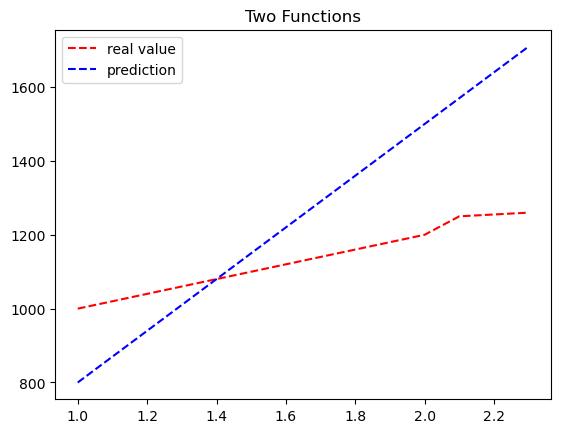

In [11]:
fig,ax=plt.subplots()
ax.plot(X_train, Z_train, "r--", X_train, prediction_tf, "b--", label="house price prediction")
ax.set_title('Two Functions')
ax.legend(['real value','prediction'])
plt.show()

#need more calculase to make two lines more fit!

In [12]:
x_train=np.array([0.,1,2,3,4,5], dtype=np.float32).reshape(-1,1)# -1 in big data would help, becuase there we don't know about the 
# last index, thus -1 can be replace as the last index, here we are creating 5*1 array but we are using -1*1 instead
y_train=np.array([0,0,0,1,1,1], dtype=np.float32).reshape(-1,1)

pos=y_train==1
neg=y_train==0
x_train[pos] # making logical statement upto the values of x_train and y_train, two values in y_train are 0 so corresponding 
# these values we have 1, 2 from x_train

array([3., 4., 5.], dtype=float32)

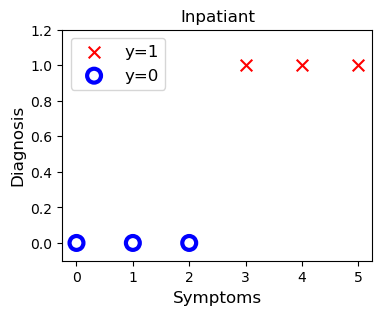

In [13]:
fig,ax=plt.subplots(1,1,figsize=(4,3))
ax.scatter(x_train[pos],y_train[pos],marker="x", s=70 ,c="r",label="y=1")
ax.scatter(x_train[neg],y_train[neg],marker="o", s=100 ,label="y=0",facecolors="none",edgecolors=["blue"],lw=3)

ax.set_ylim(-0.1,1.2)
ax.set_ylabel("Diagnosis", fontsize=12)
ax.set_xlabel("Symptoms", fontsize=12)
ax.set_title("Inpatiant")
ax.legend(fontsize=12)
plt.show()

In [14]:
model= Sequential(

   [
       tf.keras.layers.Dense(1, input_dim=1, activation="sigmoid", name="L1")
       
   ] 
    
)

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [16]:
logistic_layer=model.get_layer("L1")
w,b=logistic_layer.get_weights()
print(w,b)
print(w.shape, b.shape)

[[1.4]] [0.]
(1, 1) (1,)


In [17]:
set_w=np.array([[2]])
set_b=np.array([-4.5])
logistic_layer.set_weights([set_w,set_b])
print(logistic_layer.get_weights())

[array([[2.]], dtype=float32), array([-4.5], dtype=float32)]


In [110]:
x_train.shape # give us the dimenssion
m=(x_train.shape[0])-1
#x = range(m)
a=np.zeros(m+1).reshape(-1,1)
i=0
while i<=m :
    ai=model.predict(x_train[i].reshape(1,1))
    i+=1
    a=np.append(a, ai)
    a=np.delete(a,[0])
    if a[0]==ai:
        break
    print(a)
#help(np.delete)
# this is completly mine! 
a=a.reshape(-1,1)
a # for plotting have to reshape and make it 2-dimentional

1/1 [==============================] - 0s 24ms/step
[0.   0.   0.   0.   0.   0.01]
1/1 [==============================] - 0s 38ms/step
[0.   0.   0.   0.   0.01 0.08]
1/1 [==============================] - 0s 39ms/step
[0.   0.   0.   0.01 0.08 0.38]
1/1 [==============================] - 0s 35ms/step
[0.   0.   0.01 0.08 0.38 0.82]
1/1 [==============================] - 0s 33ms/step
[0.   0.01 0.08 0.38 0.82 0.97]
1/1 [==============================] - 0s 36ms/step
[0.01 0.08 0.38 0.82 0.97 1.  ]


array([[0.01],
       [0.08],
       [0.38],
       [0.82],
       [0.97],
       [1.  ]])

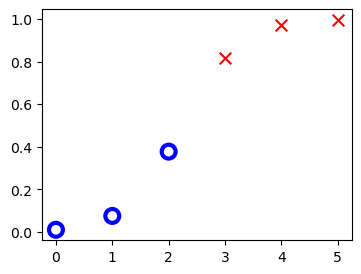

In [111]:
fig,ax=plt.subplots(1,1,figsize=(4,3))
ax.scatter(x_train[pos],a[pos],marker="x", s=70, c="r", label="y1")
ax.scatter(x_train[neg],a[neg],marker="o", s=100 ,label="y=0",facecolors="none",edgecolors=["blue"],lw=3)

In [33]:

arr = np.arange(12)  # Create a 1D array with 12 elements
print(arr)          # Output: [ 0  1  2  3  4  5  6  7  8  9 10 11]

arr_2d = arr.reshape((2, 6))  # Reshape the 1D array into a 2D array with 3 rows and 4 columns
print(arr_2d)
# Output:
# [[ 0  1  2  3]
#  [ 4  5  6  7]
#  [ 8  9 10 11]]

arr_3d = arr.reshape((2, 2, 3))  # Reshape the 1D array into a 3D array with 2 rows, 2 columns, and 3 depth levels
print(arr_3d)
# Output:
# [[[ 0  1  2]
#   [ 3  4  5]]
#
#  [[ 6  7  8]
#   [ 9 10 11]]]


[ 0  1  2  3  4  5  6  7  8  9 10 11]
[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]]
[[[ 0  1  2]
  [ 3  4  5]]

 [[ 6  7  8]
  [ 9 10 11]]]
